# Program

In [23]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import pickle
%matplotlib inline

In [24]:
import pandas as pd


df = pd.read_csv('wind_speed_dataset.csv')
df.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (degrees)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Date/Time                        50530 non-null object
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (degrees)         50530 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


# Visualization of data

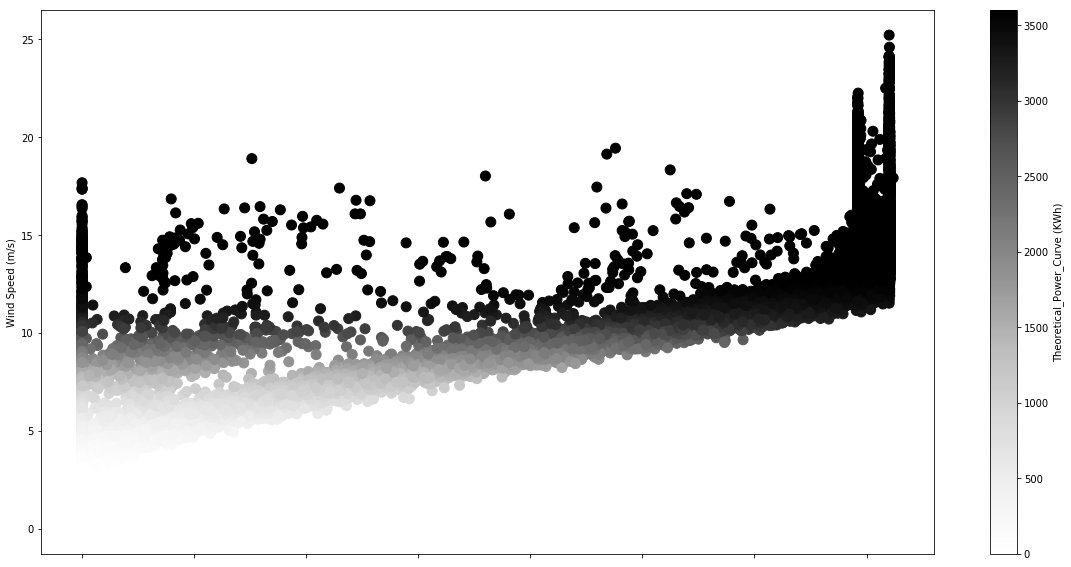

In [26]:
df.plot.scatter(x='LV ActivePower (kW)',y='Wind Speed (m/s)',c='Theoretical_Power_Curve (KWh)',s=100,figsize=(20,10))

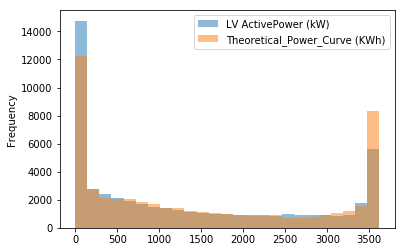

In [27]:
df[['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)']].plot.hist(alpha=0.5,bins=25)

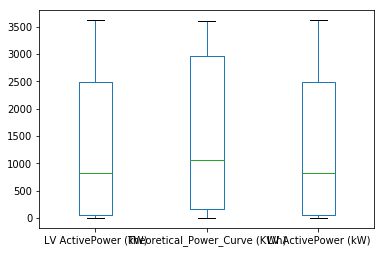

In [28]:
df[['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)', 'LV ActivePower (kW)']].plot.box()

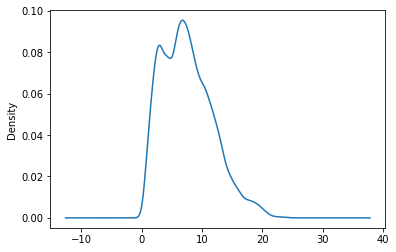

In [29]:
df['Wind Speed (m/s)'].plot.kde()

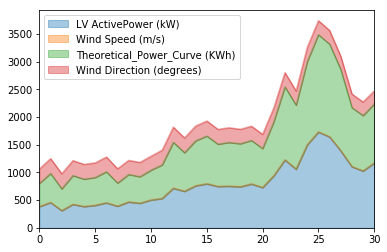

In [30]:
df.loc[0:30].plot.area(alpha=0.4)

# Taking care of missing data

In [31]:
df.isnull().sum() 

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (degrees)         0
dtype: int64

we use df.fillna(df.mean(),inplace=True) in case of missing data.
Since no data is missing so we skip adding data

In [32]:
X = df[['Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (degrees)']]
y= df['LV ActivePower (kW)']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [35]:
import numpy as np
y_pred = xgb.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

0.9050953834232285
390.98680298972494


In [61]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [62]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

0.8976649311141511
406.8290169107672


In [75]:
y_pred

array([ 522.0141557 , 1396.68905124, 1517.88666664, ...,  612.71067366,
       3501.11504947,  660.04063527])

In [37]:
#xgb.save_model("wind_energy.pkl")

In [77]:
import joblib
#save model
joblib.dump(rfc, "wind_energy.pkl") 

#load saved model
m = joblib.load("wind_energy.pkl")

In [83]:
prediction=m.predict([[34.67,21,45]])

In [86]:
prediction[0]

1174.4589197492596

In [105]:
pip install ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [106]:
wml_credentials = {
                      "apikey":"L1-qvZWih6iLNKtespNQsGVQ5zDa7ydNzhVZNGhJ7TXW",
                      "url": "https://us-south.ml.cloud.ibm.com"
}

In [107]:
from ibm_watson_machine_learning import APIClient
wml_client = APIClient(wml_credentials)

In [108]:
wml_client.repository.ModelMetaNames.show()

------------------------  ----  --------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
META_PROP NAME            TYPE  REQUIRED  SCHEMA
NAME                      str   Y
DESCRIPTION               str   N
INPUT_DATA_SCHEMA         list  N         {'id(required)': 'string', 'fields(required)': [{'name(required)': 'string', 'type(required)': 'string', 'nullable(optional)': 'string'}]}
TRAINING_DATA_REFERENCES  list  N         [{'name(optional)': 'string', 'type(required)': 'string', 'connection(required)': {'endpoint_url(required)': 'string', 'access_key_id(required)': 'string', 'secret_access_key(required)': 'string'},

In [109]:
def guid_from_space_name(wml_client, space_name):
     instance_details = wml_client.service_instance.get_details()
     space = wml_client.spaces.get_details()
     return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])

In [110]:
space_uid = "ff0b0cd8-aa87-4c8f-b468-b78244f2fe99"
#guid_from_space_name(wml_client, 'Deployment of Energy Output').   not working instances not found

In [ ]:
wml_client.set.default_space(space_uid)

In [ ]:
sw_spec_id = wml_client.software_specifications.get_id_by_name('default_py3.7')
meta_props={
 wml_client.repository.ModelMetaNames.NAME: "EnergyOutputPrediction",
 wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_id,
 wml_client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23",
}

In [ ]:
model_artifact = wml_client.repository.store_model(xgb,
                                                meta_props=meta_props,
                                                training_data=X_train,
                                                training_target=y_train)
model_uid = wml_client.repository.get_model_uid(model_artifact)
print("Model UID = " + model_uid)

In [ ]:
model_details = wml_client.repository.get_details(model_uid)
from pprint import pprint
pprint(model_details)

In [ ]:
deploy_meta = {
     wml_client.deployments.ConfigurationMetaNames.NAME: "Predict Energy Output",
     wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
 }

In [ ]:
deployment_details = wml_client.deployments.create(model_uid, meta_props=deploy_meta)

In [ ]:
deployment_uid = wml_client.deployments.get_uid(deployment_details)
print('Deployment uid = {}'.format(deployment_uid))

In [ ]:
job_payload = {
   wml_client.deployments.ScoringMetaNames.INPUT_DATA: [{
     'values': [list(X_test['Wind Speed (m/s)']), list(X_test['Theoretical_Power_Curve (KWh)']), list(X_test['Wind Direction (degrees)'])]
   }]
 }
pprint(job_payload)

In [ ]:
job_details = wml_client.deployments.score(deployment_uid,
                                        job_payload)
pprint(job_details)